In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
import pickle 
import warnings
warnings.filterwarnings('ignore')
import csv

In [2]:
# load dataset
test_dataset = pd.read_csv ("CSV_files/test_file.csv")
print("Dataset has {} rows and {} Columns".format(test_dataset.shape[0],test_dataset.shape[1])) 

Dataset has 5214 rows and 2 Columns


In [3]:
# load model training
file = open('RFM.pkl', 'rb')
regressor = pickle.load(file)


Accuracy test by R2_score 99.99662762264742

Accuracy test by MSE 97.63041296913553


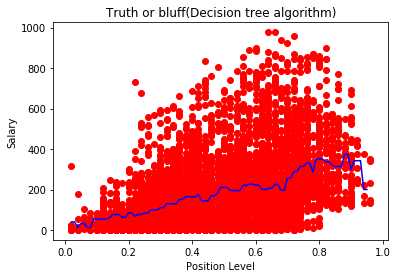

In [16]:
class Testing():
           
    def y_prediction(self,regression, x_test):
        # predicting the test set result
        y_predict = regression.predict(x_test)
        return y_predict
    
    def accuracy(self,y_predict_train,y_train):
        # acc using r2
        error = r2_score(y_train, y_predict_train)
        acc_r2 = (1-error/len(y_train))*100
        # using median_ab_error
        mse = mean_absolute_error(y_train, y_predict_train)
        mse = (1-mse/len(y_train))*100
        return acc_r2,mse
    
    def visualization(self,x_test,y_test, regression):
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        x_grid = np.arange(min(x_test), max(x_test), 0.01)
        x_grid = x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_test,y_test, color = 'red')
        plt.plot(x_grid,regression.predict(x_grid.reshape(-1,1)), color = 'blue')
        plt.title("Truth or bluff(Decision tree algorithm)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
        

def main():
    obj  = Testing()
    # seperate fetures and label
    x_test = test_dataset.iloc[:,:-1].values
    y_test = test_dataset.iloc[:,1].values
    
    y_test_predict = obj.y_prediction(regressor, x_test)
    
    acc_r2, median_ab_error = obj.accuracy(y_test_predict,y_test)
    print("\nAccuracy test by R2_score", acc_r2)
    print("\nAccuracy test by MSE", median_ab_error)

    obj.visualization(x_test,y_test,regressor)

if __name__ == '__main__':
    main()
